In [1]:
from datascience import *
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

We select ten potential countries from 1996~2016

In [2]:
medal = Table.read_table('summer.csv')
medal1 = medal.where('Year',are.above(1992)).where('Country', are.containing('USA') | are.containing('CHN') 
                    | are.containing('AUS') | are.containing('FRA') | are.containing('JPN') 
                    | are.containing('GER') | are.containing('RUS') | are.containing('ITA') 
                    | are.containing('NED') | are.containing('GBR')) 
#select the year from 1996~2012 and select ten specified countires
medal2 = medal1.drop('City') #drop the useless column of 'City'
medal2

Year,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1996,Aquatics,Diving,"XIAO, Hailiang",CHN,Men,10M Platform,Bronze
1996,Aquatics,Diving,"SAUTIN, Dmitry",RUS,Men,10M Platform,Gold
1996,Aquatics,Diving,"HEMPEL, Jan",GER,Men,10M Platform,Silver
1996,Aquatics,Diving,"CLARK, Mary Ellen",USA,Women,10M Platform,Bronze
1996,Aquatics,Diving,"FU, Mingxia",CHN,Women,10M Platform,Gold
1996,Aquatics,Diving,"WALTER, Annika",GER,Women,10M Platform,Silver
1996,Aquatics,Diving,"LENZI, Mark Edward",USA,Men,3M Springboard,Bronze
1996,Aquatics,Diving,"XIONG, Ni",CHN,Men,3M Springboard,Gold
1996,Aquatics,Diving,"YU, Zhuocheng",CHN,Men,3M Springboard,Silver
1996,Aquatics,Diving,"FU, Mingxia",CHN,Women,3M Springboard,Gold


In [3]:
country_medal1 = medal2.pivot('Medal','Country') 
#explore the ten countries' achievements based on three kinds of medal
country_medal2 = country_medal1.with_column('Total Medal', country_medal1.column('Bronze')
                                                + country_medal1.column('Gold') 
                                                + country_medal1.column('Silver')).sort('Total Medal'
                                                                                       ,descending = True)
country_medal2 #calculate the total medal numbers of the 10 countries and sort it form high to lowedal2

Country,Bronze,Gold,Silver,Total Medal
USA,304,678,355,1337
RUS,291,239,238,768
AUS,303,191,241,735
CHN,134,240,221,595
GER,239,201,147,587
NED,94,130,135,359
ITA,146,89,113,348
GBR,106,120,115,341
FRA,106,119,103,328
JPN,125,59,131,315


Plot the medal tally includes bronze, gold , silver and total medal. From the graphs we can find that USA is top one in every field.

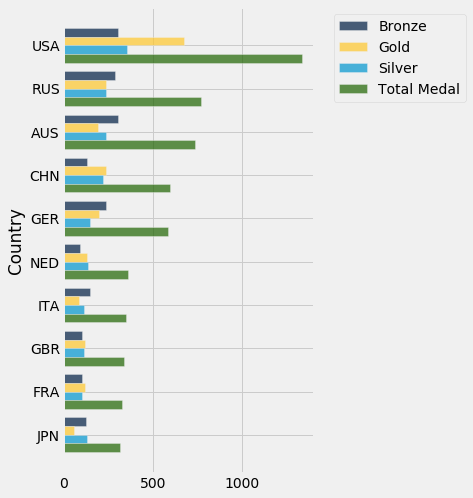

In [4]:
country_medal2.barh('Country', width=4, height =8) #plot the counts of the medals by bars

In [5]:
country_medal3 = medal2.pivot('Medal','Year')
country_medal4 = country_medal3.with_column('Total Medal', country_medal3.column('Bronze') 
                                            + country_medal3.column('Gold')
                                           + country_medal3.column('Silver'))
country_medal4

Year,Bronze,Gold,Silver,Total Medal
1996,331,372,302,1005
2000,329,424,372,1125
2004,428,392,418,1238
2008,403,442,355,1200
2012,357,436,352,1145


Year,Bronze,Gold,Silver,Total CHN Medal,CHNpercentage
1996,17,19,74,110,0.109453
2000,17,39,23,79,0.0702222
2004,15,52,27,94,0.0759289
2008,57,74,53,184,0.153333
2012,28,56,44,128,0.11179


Intercept   -4.293954
Year         0.002195
dtype: float64
Intercept       8.867075e-04
Year            5.923158e-01
I(Year ** 2)   -5.921546e-04
I(Year ** 3)    1.480096e-07
dtype: float64


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.003682,0.0,NaN,NaN,NaN
1,2.0,0.003365,1.0,0.000318,0.188781,0.706317


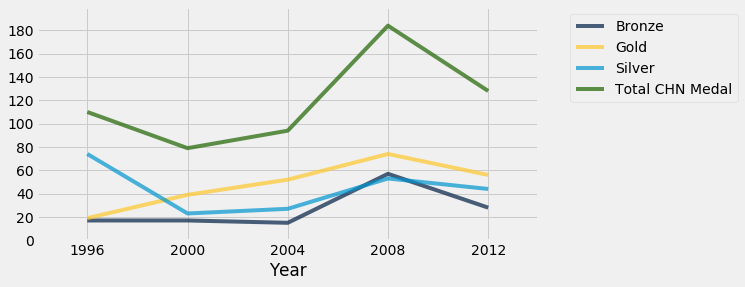

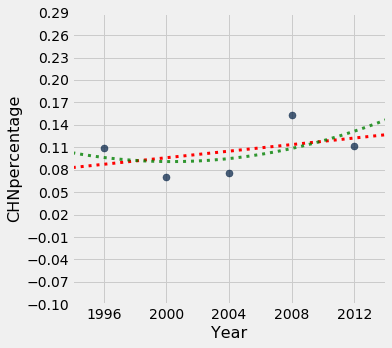

In [6]:
CHN = medal2.where('Country', are.containing('CHN'))
CHN1 = CHN.pivot('Medal','Year')
CHN2 = CHN1.with_column('Total CHN Medal', CHN1.column('Bronze') + CHN1.column('Gold') 
                                        + CHN1.column('Silver'))
CHN3 = CHN2.with_column('CHNpercentage', CHN2.column('Total CHN Medal') 
                                   / country_medal4.column('Total Medal'))
CHN3.show()


CHN3_df = CHN3.to_df()    
result1 = smf.ols(formula="CHNpercentage ~ Year", data=CHN3_df).fit()
result2 = smf.ols(formula="CHNpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=CHN3.to_df()).fit()
print(result1.params)
print(result2.params)

CHN3.plot(column_for_xticks = 0, select = np.arange(1,5), width = 8, height = 4)
plt.xlim((1994,2014))
plt.ylim((0,200))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0,200,20)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

CHN3.scatter('Year','CHNpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((0.05,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1992,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
_ = plt.plot(xs, 0.002195*xs-4.293954, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 1.480096e-07*xs3 -5.921546e-04*xs2
               +5.923158e-01*xs + 8.867075e-04, color='g', lw=3, linestyle=":",alpha=0.8)

from statsmodels.stats.anova import anova_lm
anova_lm(result1,result2)

In [7]:
a = 2020
pre1 =  (0.002195*a-4.293954)*580
print('predict1 =', np.int(pre1))

predict1 = 81


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the CHN 2020 medal should be 81

In [8]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0865882,0.0271381,0.000222802,0.172954,-0.0544459,0.227622
0.0953669,0.0191895,0.0342973,0.156436,-0.0317596,0.222493
0.104146,0.0156682,0.0542824,0.154009,-0.0179936,0.226285
0.112924,0.0191895,0.0518546,0.173994,-0.0142023,0.240051
0.121703,0.0271381,0.0353374,0.208068,-0.0193314,0.262737


In [9]:
result1.predict()

array([0.08658824, 0.09536688, 0.10414552, 0.11292416, 0.12170281])

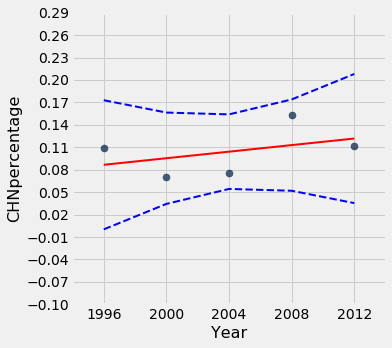

In [10]:
CHN3.scatter('Year','CHNpercentage',s=50,width=5, height=5)

xs = np.sort(CHN3.column('Year'))
pos = np.argsort(CHN3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((0.05,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total USA Medal,USApercentage
1996,52,160,48,260,0.258706
2000,52,130,66,248,0.220444
2004,73,116,75,264,0.213247
2008,81,125,109,315,0.2625
2012,46,147,57,250,0.218341


Intercept    2.172323
Year        -0.000967
dtype: float64
Intercept       5.974941e-04
Year            3.991228e-01
I(Year ** 2)   -3.976708e-04
I(Year ** 3)    9.908407e-08
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.002131,0.0,NaN,NaN,NaN
1,2.0,0.001990,1.0,0.000141,0.141234,0.743175


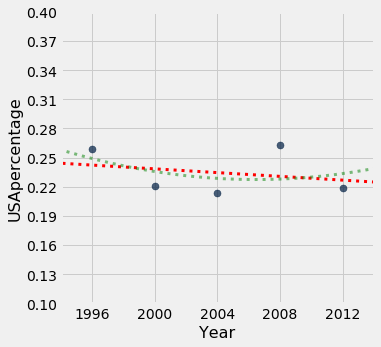

In [11]:
USA = medal2.where('Country', are.containing('USA'))
USA1 = USA.pivot('Medal','Year')
USA2 = USA1.with_column('Total USA Medal', USA1.column('Bronze') + USA1.column('Gold') 
                                        + USA1.column('Silver'))
USA3 = USA2.with_column('USApercentage', USA2.column('Total USA Medal') 
                                   / country_medal4.column('Total Medal'))
USA3.show()


USA3_df = USA3.to_df()    
result1 = smf.ols(formula="USApercentage ~ Year", data=USA3_df).fit()
result2 = smf.ols(formula="USApercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=USA3.to_df()).fit()
print(result1.params)
print(result2.params)

USA3.scatter('Year','USApercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((0.20,0.27))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0.1,0.4,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.000967*xs +2.172323, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 9.908407e-08*xs3 -3.976708e-04*xs2
               +3.991228e-01*xs + 5.974941e-04, color='g', lw=3, linestyle=":",alpha=0.5)

anova_lm(result1, result2)

In [12]:
a = 2020
pre1 =  (-0.000967*a+2.172323)*580
print('predict1 =', np.int(pre1))

predict1 = 127


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the USA 2020 medal should be 127

In [13]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.242383,0.0206428,0.176688,0.308078,0.135104,0.349662
0.238515,0.0145967,0.192062,0.284968,0.141816,0.335215
0.234648,0.0119181,0.196719,0.272577,0.141742,0.327554
0.23078,0.0145967,0.184327,0.277233,0.13408,0.32748
0.226913,0.0206428,0.161218,0.292607,0.119634,0.334191


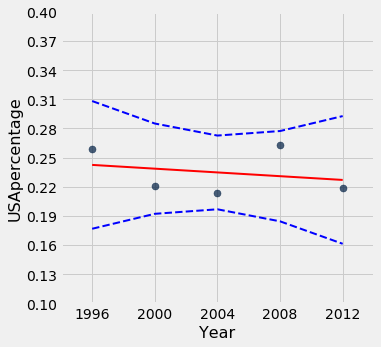

In [14]:
USA3.scatter('Year','USApercentage',s=50,width=5, height=5)

xs = np.sort(USA3.column('Year'))
pos = np.argsort(USA3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((0.20,0.27))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0.1,0.4,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total RUS Medal,RUSpercentage
1996,34,36,45,115,0.114428
2000,54,66,68,188,0.167111
2004,96,47,49,192,0.155089
2008,56,43,44,143,0.119167
2012,51,47,32,130,0.113537


Intercept    2.625135
Year        -0.001243
dtype: float64
Intercept      -1.874979e-03
Year           -1.252475e+00
I(Year ** 2)    1.250704e-03
I(Year ** 3)   -3.122142e-07
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.002316,0.0,NaN,NaN,NaN
1,2.0,0.000910,1.0,0.001406,3.091425,0.220781


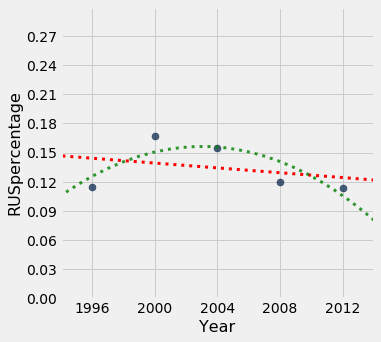

In [15]:
RUS = medal2.where('Country', are.containing('RUS'))
RUS1 = RUS.pivot('Medal','Year')
RUS2 = RUS1.with_column('Total RUS Medal', RUS1.column('Bronze') + RUS1.column('Gold') 
                                        + RUS1.column('Silver'))
RUS3 = RUS2.with_column('RUSpercentage', RUS2.column('Total RUS Medal') 
                                   / country_medal4.column('Total Medal'))
RUS3.show()


RUS3_df = RUS3.to_df()    
result1 = smf.ols(formula="RUSpercentage ~ Year", data=RUS3_df).fit()
result2 = smf.ols(formula="RUSpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=RUS3.to_df()).fit()
print(result1.params)
print(result2.params)

RUS3.scatter('Year','RUSpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((0,0.3))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.001243*xs +2.625135, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, -3.122142e-07*xs3 +1.250704e-03*xs2
               -1.252475e+00*xs -1.874979e-03, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)

In [16]:
a = 2020
pre1 =  (-0.001243*a + 2.625135)*580
print('predict1 =', np.int(pre1))

predict1 = 66


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the RUS 2020 medal should be 66

In [17]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.143812,0.02152,0.0753252,0.212298,0.0319739,0.255649
0.138839,0.0152169,0.0904118,0.187266,0.0380298,0.239648
0.133866,0.0124246,0.0943257,0.173407,0.0370121,0.230721
0.128894,0.0152169,0.0804666,0.177321,0.0280846,0.229703
0.123921,0.02152,0.0554348,0.192407,0.0120835,0.235759


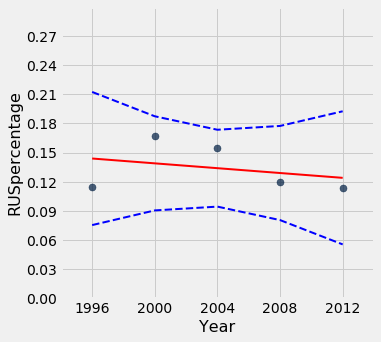

In [18]:
RUS3.scatter('Year','RUSpercentage',s=50,width=5, height=5)

xs = np.sort(RUS3.column('Year'))
pos = np.argsort(RUS3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((0,0.3))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total ITA Medal,ITApercentage
1996,28,19,24,71,0.0706468
2000,29,22,14,65,0.0577778
2004,39,24,39,102,0.082391
2008,20,8,14,42,0.035
2012,30,16,22,68,0.0593886


Intercept    2.330271
Year        -0.001132
dtype: float64
Intercept       3.825869e-05
Year            2.555659e-02
I(Year ** 2)   -2.489508e-05
I(Year ** 3)    6.066559e-09
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.001034,0.0,NaN,NaN,NaN
1,2.0,0.001034,1.0,4.818915e-07,0.000932,0.978417


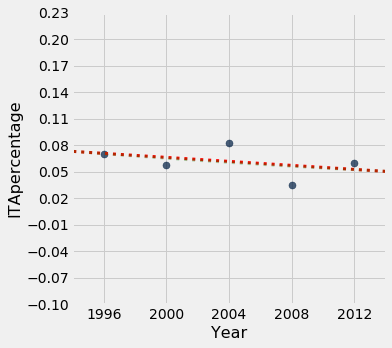

In [19]:
ITA = medal2.where('Country', are.containing('ITA'))
ITA1 = ITA.pivot('Medal','Year')
ITA2 = ITA1.with_column('Total ITA Medal', ITA1.column('Bronze') + ITA1.column('Gold') 
                                        + ITA1.column('Silver'))
ITA3 = ITA2.with_column('ITApercentage', ITA2.column('Total ITA Medal') 
                                   / country_medal4.column('Total Medal'))
ITA3.show()


ITA3_df = ITA3.to_df()    
result1 = smf.ols(formula="ITApercentage ~ Year", data=ITA3_df).fit()
result2 = smf.ols(formula="ITApercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=ITA3.to_df()).fit()
print(result1.params)
print(result2.params)

ITA3.scatter('Year','ITApercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.1))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.25,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.001132*xs +2.330271, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 6.066559e-09*xs3 -2.489508e-05*xs2
               +2.555659e-02*xs + 3.825869e-05, color='g', lw=3, linestyle=":",alpha=0.3)

anova_lm(result1, result2)

In [20]:
a = 2020
pre1 =  (-0.001132*a +2.330271)*580
print('predict1 =', np.int(pre1))

predict1 = 25


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the ITA 2020 medal should be 25

In [21]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0700996,0.0143837,0.0243244,0.115875,-0.00465102,0.14485
0.0655702,0.0101708,0.0332022,0.0979382,-0.0018091,0.13295
0.0610408,0.00830441,0.0346125,0.0874692,-0.00369514,0.125777
0.0565114,0.0101708,0.0241434,0.0888794,-0.0108679,0.123891
0.051982,0.0143837,0.00620679,0.0977573,-0.0227686,0.126733


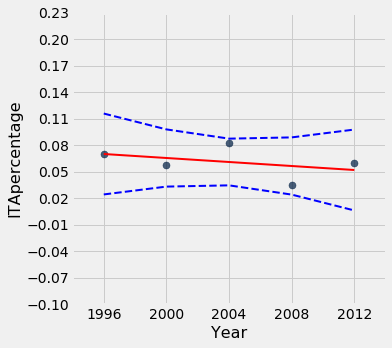

In [22]:
ITA3.scatter('Year','ITApercentage',s=50,width=5, height=5)

xs = np.sort(ITA3.column('Year'))
pos = np.argsort(ITA3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.1))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.25,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total FRA Medal,FRApercentage
1996,20,21,10,51,0.0507463
2000,14,22,30,66,0.0586667
2004,22,21,10,53,0.042811
2008,28,25,23,76,0.0633333
2012,22,30,30,82,0.0716157


Intercept   -2.267484
Year         0.001160
dtype: float64
Intercept       4.939297e-04
Year            3.299423e-01
I(Year ** 2)   -3.298219e-04
I(Year ** 3)    8.243155e-08
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000281,0.0,NaN,NaN,NaN
1,2.0,0.000182,1.0,0.000098,1.08102,0.407662


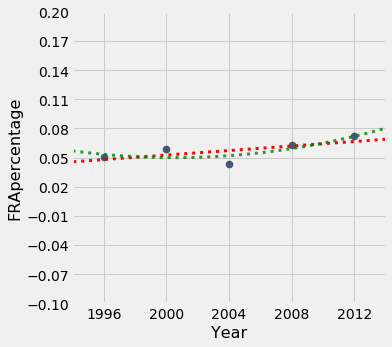

In [23]:
FRA = medal2.where('Country', are.containing('FRA'))
FRA1 = FRA.pivot('Medal','Year')
FRA2 = FRA1.with_column('Total FRA Medal', FRA1.column('Bronze') + FRA1.column('Gold') 
                                        + FRA1.column('Silver'))
FRA3 = FRA2.with_column('FRApercentage', FRA2.column('Total FRA Medal') 
                                   / country_medal4.column('Total Medal'))
FRA3.show()


FRA3_df = FRA3.to_df()    
result1 = smf.ols(formula="FRApercentage ~ Year", data=FRA3_df).fit()
result2 = smf.ols(formula="FRApercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=FRA3.to_df()).fit()
print(result1.params)
print(result2.params)

FRA3.scatter('Year','FRApercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, 0.001160*xs -2.267484, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 8.243155e-08*xs3 -3.298219e-04*xs2
               +3.299423e-01*xs + 4.939297e-04, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)

In [24]:
a = 2020
pre1 =  (0.001160*a -2.267484)*580
print('predict1 =', np.int(pre1))

predict1 = 43


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the FRA 2020 medal should be 43

In [25]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0481535,0.00749204,0.0243105,0.0719965,0.00921799,0.087089
0.052794,0.00529767,0.0359345,0.0696536,0.0176981,0.08789
0.0574346,0.00432553,0.0436688,0.0712004,0.0237155,0.0911537
0.0620752,0.00529767,0.0452156,0.0789347,0.0269792,0.0971711
0.0667157,0.00749204,0.0428727,0.0905587,0.0277802,0.105651


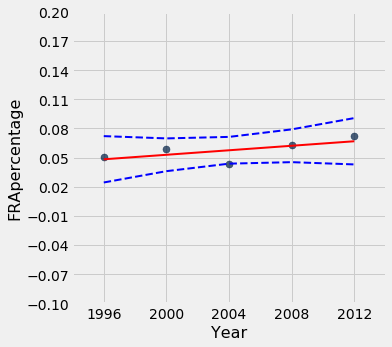

In [26]:
FRA3.scatter('Year','FRApercentage',s=50,width=5, height=5)

xs = np.sort(FRA3.column('Year'))
pos = np.argsort(FRA3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total AUS Medal,AUSpercentage
1996,84,32,16,132,0.131343
2000,54,60,69,183,0.162667
2004,30,49,78,157,0.126817
2008,76,31,42,149,0.124167
2012,59,19,36,114,0.0995633


Intercept    5.242114
Year        -0.002551
dtype: float64
Intercept      -1.044042e-03
Year           -6.974143e-01
I(Year ** 2)    6.973962e-04
I(Year ** 3)   -1.743263e-07
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000992,0.0,NaN,NaN,NaN
1,2.0,0.000551,1.0,0.000441,1.598928,0.333457


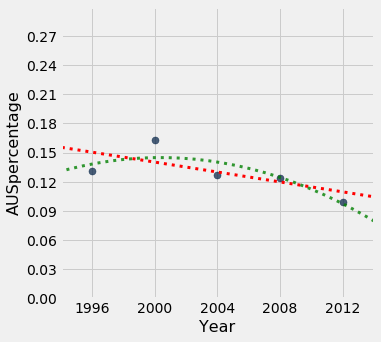

In [27]:
AUS = medal2.where('Country', are.containing('AUS'))
AUS1 = AUS.pivot('Medal','Year')
AUS2 = AUS1.with_column('Total AUS Medal', AUS1.column('Bronze') + AUS1.column('Gold') 
                                        + AUS1.column('Silver'))
AUS3 = AUS2.with_column('AUSpercentage', AUS2.column('Total AUS Medal') 
                                   / country_medal4.column('Total Medal'))
AUS3.show()


AUS3_df = AUS3.to_df()    
result1 = smf.ols(formula="AUSpercentage ~ Year", data=AUS3_df).fit()
result2 = smf.ols(formula="AUSpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=AUS3.to_df()).fit()
print(result1.params)
print(result2.params)

AUS3.scatter('Year','AUSpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((0,0.3))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.002551*xs +5.242114, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, -1.743263e-07*xs3 +6.973962e-04*xs2
               -6.974143e-01*xs -1.044042e-03, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)

In [28]:
a = 2020
pre1 =  ( -0.002551*a +5.242114)*580
print('predict1 =', np.int(pre1))

predict1 = 51


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the AUS 2020 medal should be 51

In [29]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.149323,0.0140849,0.104499,0.194148,0.0761257,0.222521
0.139117,0.0099595,0.107422,0.170813,0.0731379,0.205097
0.128911,0.0081319,0.103032,0.154791,0.0655203,0.192303
0.118705,0.0099595,0.0870099,0.150401,0.0527259,0.184685
0.108499,0.0140849,0.0636752,0.153324,0.0353017,0.181697


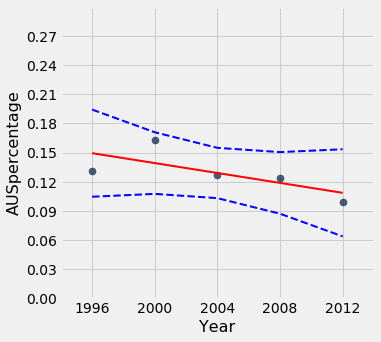

In [30]:
AUS3.scatter('Year','AUSpercentage',s=50,width=5, height=5)

xs = np.sort(AUS3.column('Year'))
pos = np.argsort(AUS3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((0,0.3))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(0,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total JPN Medal,JPNpercentage
1996,14,3,26,43,0.0427861
2000,8,5,30,43,0.0382222
2004,53,21,20,94,0.0759289
2008,17,23,11,51,0.0425
2012,33,7,44,84,0.0733624


Intercept   -3.223510
Year         0.001636
dtype: float64
Intercept      -7.859624e-06
Year           -5.250186e-03
I(Year ** 2)    4.464221e-06
I(Year ** 3)   -9.135590e-10
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000933,0.0,NaN,NaN,NaN
1,2.0,0.000933,1.0,2.433042e-09,0.000005,0.998385


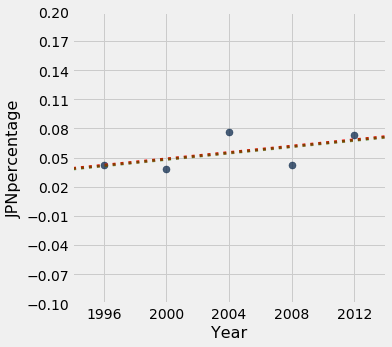

In [31]:
JPN = medal2.where('Country', are.containing('JPN'))
JPN1 = JPN.pivot('Medal','Year')
JPN2 = JPN1.with_column('Total JPN Medal', JPN1.column('Bronze') + JPN1.column('Gold') 
                                        + JPN1.column('Silver'))
JPN3 = JPN2.with_column('JPNpercentage', JPN2.column('Total JPN Medal') 
                                   / country_medal4.column('Total Medal'))
JPN3.show()


JPN3_df = JPN3.to_df()    
result1 = smf.ols(formula="JPNpercentage ~ Year", data=JPN3_df).fit()
result2 = smf.ols(formula="JPNpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=JPN3.to_df()).fit()
print(result1.params)
print(result2.params)

JPN3.scatter('Year','JPNpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, 0.001636*xs -3.223510, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, -9.135590e-10*xs3 +4.464221e-06*xs2
               -5.250186e-03*xs -7.859624e-06, color='g', lw=3, linestyle=":",alpha=0.5)

anova_lm(result1, result2)


In [32]:
a = 2020
pre1 =  (0.001636*a -3.223510 +0.03)*580
print('predict1 =', np.int(pre1))

predict1 = 64


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the JPN 2020 medal should be 64

In [33]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0414738,0.0136604,-0.00199982,0.0849475,-0.0295183,0.112466
0.0480169,0.0096594,0.0172764,0.0787574,-0.0159746,0.112008
0.0545599,0.00788686,0.0294604,0.0796595,-0.00692108,0.116041
0.061103,0.0096594,0.0303625,0.0918435,-0.00288848,0.125094
0.067646,0.0136604,0.0241724,0.11112,-0.00334612,0.138638


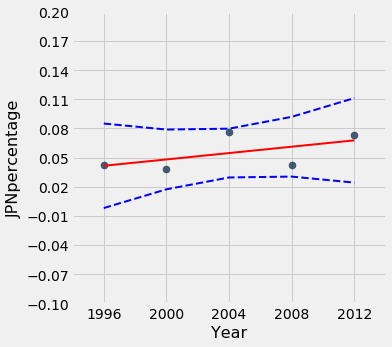

In [34]:
JPN3.scatter('Year','JPNpercentage',s=50,width=5, height=5)

xs = np.sort(JPN3.column('Year'))
pos = np.argsort(JPN3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total GBR Medal,GBRpercentage
1996,9,2,15,26,0.0258706
2000,13,22,20,55,0.0488889
2004,15,17,25,57,0.046042
2008,21,31,25,77,0.0641667
2012,48,48,30,126,0.110044


Intercept   -9.140551
Year         0.004591
dtype: float64
Intercept       8.812693e-04
Year            5.886831e-01
I(Year ** 2)   -5.897585e-04
I(Year ** 3)    1.477128e-07
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000628,0.0,NaN,NaN,NaN
1,2.0,0.000309,1.0,0.000319,2.062728,0.287455


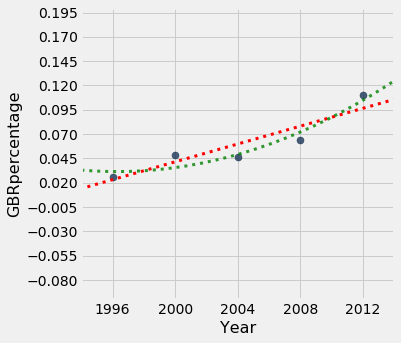

In [35]:
GBR = medal2.where('Country', are.containing('GBR'))
GBR1 = GBR.pivot('Medal','Year')
GBR2 = GBR1.with_column('Total GBR Medal', GBR1.column('Bronze') + GBR1.column('Gold') 
                                        + GBR1.column('Silver'))
GBR3 = GBR2.with_column('GBRpercentage', GBR2.column('Total GBR Medal') 
                                   / country_medal4.column('Total Medal'))
GBR3.show()


GBR3_df = GBR3.to_df()    
result1 = smf.ols(formula="GBRpercentage ~ Year", data=GBR3_df).fit()
result2 = smf.ols(formula="GBRpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=GBR3.to_df()).fit()
print(result1.params)
print(result2.params)

GBR3.scatter('Year','GBRpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.08,0.2,0.025)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, 0.004591*xs -9.140551, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 1.477128e-07*xs3 -5.897585e-04*xs2
               +5.886831e-01*xs + 8.812693e-04, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)


In [36]:
a = 2020
pre1 =  (0.004591*a -9.140551)*580
print('predict1 =', np.int(pre1))

predict1 = 77


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the GBR 2020 medal should be 77

In [37]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0222776,0.0112078,-0.0133907,0.0579459,-0.0359685,0.0805238
0.04064,0.00792514,0.0154187,0.0658613,-0.0118624,0.0931424
0.0590024,0.00647085,0.0384092,0.0795955,0.00855973,0.109445
0.0773648,0.00792514,0.0521434,0.102586,0.0248624,0.129867
0.0957271,0.0112078,0.0600588,0.131395,0.037481,0.153973


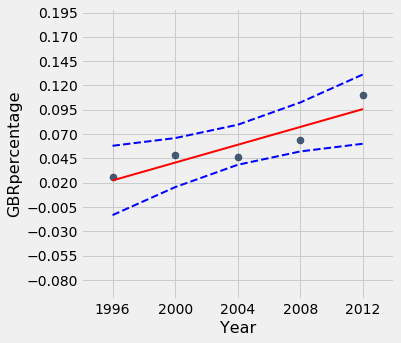

In [38]:
GBR3.scatter('Year','GBRpercentage',s=50,width=5, height=5)

xs = np.sort(GBR3.column('Year'))
pos = np.argsort(GBR3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.08,0.2,0.025)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total GER Medal,GERpercentage
1996,47,42,35,124,0.123383
2000,65,31,23,119,0.105778
2004,63,41,45,149,0.120355
2008,43,42,16,101,0.0841667
2012,21,45,28,94,0.0820961


Intercept    5.322831
Year        -0.002605
dtype: float64
Intercept      -2.557083e-04
Year           -1.708117e-01
I(Year ** 2)    1.718487e-04
I(Year ** 3)   -4.320701e-08
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000430,0.0,NaN,NaN,NaN
1,2.0,0.000403,1.0,0.000028,0.137537,0.74634


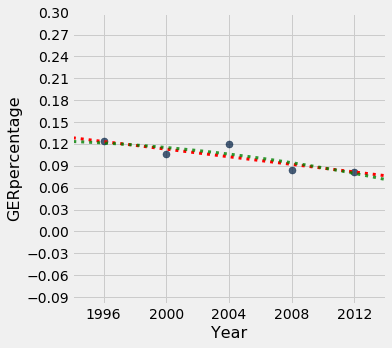

In [39]:
GER = medal2.where('Country', are.containing('GER'))
GER1 = GER.pivot('Medal','Year')
GER2 = GER1.with_column('Total GER Medal', GER1.column('Bronze') + GER1.column('Gold') 
                                        + GER1.column('Silver'))
GER3 = GER2.with_column('GERpercentage', GER2.column('Total GER Medal') 
                                   / country_medal4.column('Total Medal'))
GER3.show()


GER3_df = GER3.to_df()    
result1 = smf.ols(formula="GERpercentage ~ Year", data=GER3_df).fit()
result2 = smf.ols(formula="GERpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=GER3.to_df()).fit()
print(result1.params)
print(result2.params)

GER3.scatter('Year','GERpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.09,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.002605*xs +5.322831, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, -4.320701e-08*xs3 +1.718487e-04*xs2
               -1.708117e-01*xs -2.557083e-04, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)

In [40]:
a = 2020
pre1 =  (-0.002605*a +5.322831)*580
print('predict1 =', np.int(pre1))

predict1 = 35


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the GER 2020 medal should be 35

In [41]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.123993,0.0092789,0.0944632,0.153522,0.0757712,0.172214
0.113574,0.00656117,0.0926937,0.134455,0.0701079,0.157041
0.103156,0.00535717,0.0861069,0.120205,0.0613947,0.144917
0.0927373,0.00656117,0.0718567,0.113618,0.0492709,0.136204
0.0823188,0.0092789,0.0527892,0.111848,0.0340972,0.13054


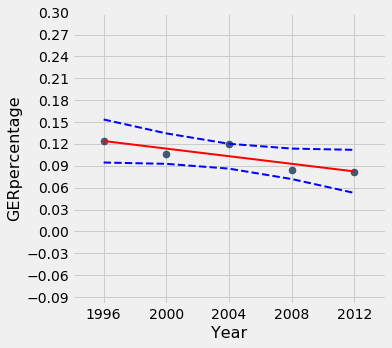

In [42]:
GER3.scatter('Year','GERpercentage',s=50,width=5, height=5)

xs = np.sort(GER3.column('Year'))
pos = np.argsort(GER3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.09,0.3,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

Year,Bronze,Gold,Silver,Total NED Medal,NEDpercentage
1996,26,38,9,73,0.0726368
2000,23,27,29,79,0.0702222
2004,22,4,50,76,0.0613893
2008,4,40,18,62,0.0516667
2012,19,21,29,69,0.060262


Intercept    2.232824
Year        -0.001083
dtype: float64
Intercept       2.871703e-04
Year            1.918282e-01
I(Year ** 2)   -1.908590e-04
I(Year ** 3)    4.748068e-08
dtype: float64


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3.0,0.000096,0.0,NaN,NaN,NaN
1,2.0,0.000064,1.0,0.000032,1.007244,0.421261


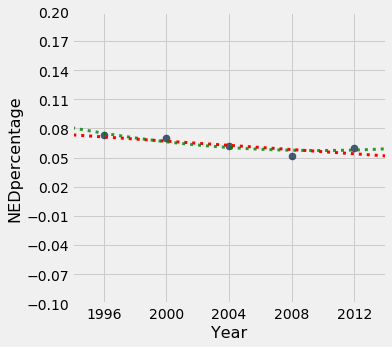

In [43]:
NED = medal2.where('Country', are.containing('NED'))
NED1 = NED.pivot('Medal','Year')
NED2 = NED1.with_column('Total NED Medal', NED1.column('Bronze') + NED1.column('Gold') 
                                        + NED1.column('Silver'))
NED3 = NED2.with_column('NEDpercentage', NED2.column('Total NED Medal') 
                                   / country_medal4.column('Total Medal'))
NED3.show()


NED3_df = NED3.to_df()    
result1 = smf.ols(formula="NEDpercentage ~ Year", data=NED3_df).fit()
result2 = smf.ols(formula="NEDpercentage ~ Year + I(Year**2) + I(Year**3)", 
                 data=NED3.to_df()).fit()
print(result1.params)
print(result2.params)

NED3.scatter('Year','NEDpercentage',s=50,width=5, height=5)
plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

xs = np.linspace(1990,2016,30)
xs2 = np.power(xs,2)
xs3 = np.power(xs,3)
xs4 = np.power(xs,4)
_ = plt.plot(xs, -0.001083*xs +2.232824, color='r', lw=3, linestyle=":")
_ = plt.plot(xs, 4.748068e-08*xs3 -1.908590e-04*xs2
               +1.918282e-01*xs + 2.871703e-04, color='g', lw=3, linestyle=":",alpha=0.8)

anova_lm(result1, result2)

In [44]:
a = 2020
pre1 =  (-0.001083*a +2.232824)*580
print('predict1 =', np.int(pre1))

predict1 = 26


This is a hypothesis on two models. The null hypothesis is that models of order 1 and order 4 fit the data equally well. Since here the p-value is more than 0.05, we cannot reject the null hypothesis. That is, the quadratic model and the cubic model fits the data equally well.

In this case, we prefer the linear model (model of order 1), i.e., the model with fewer parameters.

So the NED 2020 medal should be 26

In [45]:
predictions = result1.get_prediction()
predictions.summary_frame(alpha=0.05).head()
frame = Table().from_df(predictions.summary_frame(alpha=0.05))
frame.show(6)

mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0.0718964,0.00437614,0.0579696,0.0858233,0.049154,0.0946389
0.0675659,0.0030944,0.0577182,0.0774137,0.0470662,0.0880657
0.0632354,0.00252657,0.0551947,0.0712761,0.0435399,0.0829309
0.0589049,0.0030944,0.0490571,0.0687527,0.0384051,0.0794046
0.0545744,0.00437614,0.0406475,0.0685012,0.0318319,0.0773168


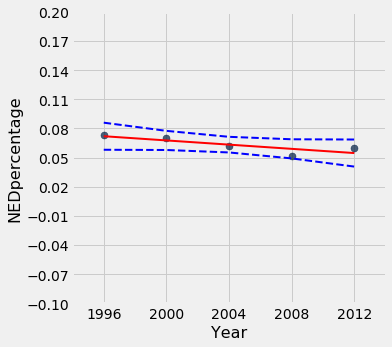

In [46]:
NED3.scatter('Year','NEDpercentage',s=50,width=5, height=5)

xs = np.sort(NED3.column('Year'))
pos = np.argsort(NED3.column('Year'))

plt.xlim((1994,2014))
plt.ylim((-0.1,0.2))
x_ticks = np.arange(1996,2016,4)
y_ticks = np.arange(-0.1,0.2,0.03)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

_ = plt.plot(xs, frame.column('mean')[pos], linestyle='-', color='r', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_lower')[pos], linestyle='--', color='b', lw=2)
_ = plt.plot(xs, frame.column('mean_ci_upper')[pos], linestyle='--', color='b', lw=2)

In [47]:
countries = make_array('CHN', 'USA', 'RUS','AUS','JPN','FRA','UKR','GBR','ITA','GER')
predict = Table().with_columns("Country", countries,
                            "2020 Medal Predict", make_array(81,127,66,51,64,43,26,39,25,35))
predict.sort('2020 Medal Predict',descending = True)

Country,2020 Medal Predict
USA,127
CHN,81
RUS,66
JPN,64
AUS,51
FRA,43
GBR,39
GER,35
UKR,26
ITA,25
